In [3]:
import pandas as pd
import numpy as np
import json, re
import datetime
import time

In [4]:
spy_data = pd.read_csv('clean_spy_data.csv')

spy_data

,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,288908,f10c3152,2023-03-17T13:49:01.7960000Z,2023-03-17T13:49:15.073Z,executed,levels/collaborateur/niveau03,NaN,NaN
1,288914,f10c3152,2023-03-17T13:48:57.6240000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
2,288930,f10c3152,2023-03-17T13:48:48.9860000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
3,288945,f10c3152,2023-03-17T13:48:41.1910000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
4,289002,f10c3152,2023-03-17T13:48:10.5390000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
...,...,...,...,...,...,...,...,...
327396,201753,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327397,201785,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327398,201823,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN
327399,201833,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN


In [5]:
# Get the actor who has the longest time and convert the time in the format 'HH:MM:SS'
print('Longest time: ')
display(spy_data[spy_data['time'] == spy_data['time'].max()]['time'].apply(lambda x: str(datetime.timedelta(seconds=x))))
# Display the actor
display(spy_data[spy_data['time'] == spy_data['time'].max()]['actor'])

print('----------------------------------------')

# Get the actor who has the shortest time and convert the time in the format 'HH:MM:SS'
print('Shortest time: ')
display(spy_data[spy_data['time'] == spy_data['time'].min()]['time'].apply(lambda x: str(datetime.timedelta(seconds=x))))

Longest time: 


58091    1 day, 17:43:33.291000
Name: time, dtype: object

58091    D4039AEB
Name: actor, dtype: object

----------------------------------------
Shortest time: 


16877    0:00:00.215000
Name: time, dtype: object

In [6]:
# Get the mean time by selecting the completed verbs and store it in a variable
print('Mean time: ')
mean_time = spy_data[spy_data['verb'] == 'completed']['time'].mean()

seconds_to_format = lambda seconds: time.strftime('%Hh %Mmin %Ssec', time.gmtime(seconds))

seconds_to_format(mean_time)

Mean time: 


'00h 01min 20sec'

In [7]:
# Get the median time by selecting the completed verbs and store it in a variable
print('Median time: ')
median_time = spy_data[spy_data['verb'] == 'completed']['time'].median()

print(seconds_to_format(median_time))

print('----------------------------------------')

# Get the standard deviation time by selecting the completed verbs and store it in a variable
print('Standard deviation time: ')
std_time = spy_data[spy_data['verb'] == 'completed']['time'].std()

print(seconds_to_format(std_time))

print('----------------------------------------')

# Get the variance time by selecting the completed verbs and store it in a variable
print('Variance time: ')
var_time = spy_data[spy_data['verb'] == 'completed']['time'].var()

print(seconds_to_format(var_time))

print('----------------------------------------')

# Get the 25th percentile time by selecting the completed verbs and store it in a variable
print('25th percentile time: ')
percentile_25 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.25)

print(seconds_to_format(percentile_25))

print('----------------------------------------')

# Get the 50th percentile time by selecting the completed verbs and store it in a variable
print('50th percentile time: ')
percentile_50 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.5)

print(seconds_to_format(percentile_50))

print('----------------------------------------')

# Get the 75th percentile time by selecting the completed verbs and store it in a variable
print('75th percentile time: ')
percentile_75 = spy_data[spy_data['verb'] == 'completed']['time'].quantile(0.75)

print(seconds_to_format(percentile_75))

Median time: 
00h 00min 49sec
----------------------------------------
Standard deviation time: 
00h 18min 15sec
----------------------------------------
Variance time: 
21h 25min 29sec
----------------------------------------
25th percentile time: 
00h 00min 27sec
----------------------------------------
50th percentile time: 
00h 00min 49sec
----------------------------------------
75th percentile time: 
00h 01min 28sec


In [8]:
# Get a list of the 1% of the fastest actors
print('----------------------------------------')
print('Fastest actors: ')
fastest_actors = spy_data[spy_data['verb'] == 'completed'].sort_values(by='time').head(int(len(spy_data[spy_data['verb'] == 'completed'])*0.01))['actor'].tolist()

len(fastest_actors)

----------------------------------------
Fastest actors: 


189

----------------------------------------
Classes: 


<Axes: >

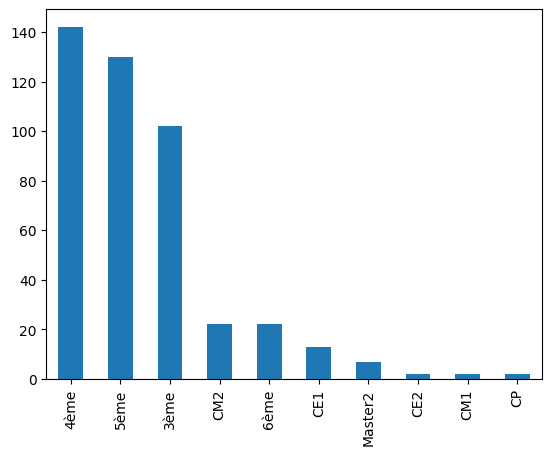

In [9]:
 # Load the spy_profile.csv file
spy_profile = pd.read_csv('profiles.csv')

student_classes = [obj.__str__() for obj in spy_profile['predicted_class'].tolist()]

# Ploting the classes
print('----------------------------------------')
print('Classes: ')
pd.Series(student_classes).value_counts().plot(kind='bar')

In [11]:
# Get rid of actors which are not in the spy_profile.csv file and store the result in a variable
print('----------------------------------------')
print('Actors in the spy_profile.csv file: ')
spy_data_real = spy_data[spy_data['actor'].isin(spy_profile['ID'].tolist())]

----------------------------------------
Actors in the spy_profile.csv file: 


In [12]:
# Merge the spy_data_real and spy_profile dataframes
print('----------------------------------------')
print('Merged dataframes: ')
merged_data = pd.merge(spy_data_real, spy_profile, left_on='actor', right_on='ID')

merged_data

----------------------------------------
Merged dataframes: 


,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,93666,FEDB8DB7,2023-06-05T12:58:22.9100000Z,2023-06-05T14:03:32.527Z,completed,levels/repetiteur/niveau07,True,52.51,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
1,93668,FEDB8DB7,2023-06-05T12:58:09.6130000Z,2023-06-05T14:03:32.527Z,executed,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
2,93669,FEDB8DB7,2023-06-05T12:58:07.4590000Z,2023-06-05T14:03:32.527Z,deleted,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
3,93670,FEDB8DB7,2023-06-05T12:58:07.3850000Z,2023-06-05T14:03:32.527Z,modified,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
4,93678,FEDB8DB7,2023-06-05T12:57:30.4000000Z,2023-06-05T14:03:32.527Z,launched,levels/repetiteur/niveau07,NaN,NaN,FEDB8DB7,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263144,201753,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263145,201785,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263146,201823,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263147,201833,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32


In [13]:
# Drop the ID column and Unnamed: 0 column
merged_data = merged_data.drop(['ID', 'Unnamed: 0'], axis=1)

merged_data

,actor,timestamp,stored,verb,levels,result,time,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,FEDB8DB7,2023-06-05T12:58:22.9100000Z,2023-06-05T14:03:32.527Z,completed,levels/repetiteur/niveau07,True,52.51,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
1,FEDB8DB7,2023-06-05T12:58:09.6130000Z,2023-06-05T14:03:32.527Z,executed,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
2,FEDB8DB7,2023-06-05T12:58:07.4590000Z,2023-06-05T14:03:32.527Z,deleted,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
3,FEDB8DB7,2023-06-05T12:58:07.3850000Z,2023-06-05T14:03:32.527Z,modified,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
4,FEDB8DB7,2023-06-05T12:57:30.4000000Z,2023-06-05T14:03:32.527Z,launched,levels/repetiteur/niveau07,NaN,NaN,5ème,502,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-05 16:03:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263144,103D4EAB,2023-05-25T07:26:02.1560000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263145,103D4EAB,2023-05-25T07:25:52.1960000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263146,103D4EAB,2023-05-25T07:25:42.6570000Z,2023-05-25T07:23:31.166Z,interacted,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
263147,103D4EAB,2023-05-25T07:25:39.6780000Z,2023-05-25T07:23:31.166Z,opened,levels/tutoriel/tutoriel,NaN,NaN,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32


In [97]:
# For each actor, get the number of completed verbs and store the result in a variable
completed_verbs = merged_data[merged_data['verb'] == 'completed']
# Remove the verbs which have a result equal to False
completed_verbs = completed_verbs[completed_verbs['result'] != False]

# Get the number of unique levels completed by each actor along with the actor's predicted class
print('----------------------------------------')
print('Number of unique levels completed by each actor along with the actor\'s predicted class: ')
completed_verbs = completed_verbs.groupby(['actor', 'predicted_class'])['levels'].nunique()

completed_verbs

# Add a column to completed_verbs dataframe which contains the total time spent by each actor
completed_verbs = completed_verbs.to_frame().reset_index()
completed_verbs['total_time'] = completed_verbs['actor'].apply(lambda x: spy_data[spy_data['actor'] == x]['time'].sum())

completed_verbs

----------------------------------------
Number of unique levels completed by each actor along with the actor's predicted class: 


,actor,predicted_class,levels,total_time
0,103D4EAB,3ème,12,816.681
1,133323C,5ème,32,4715.042
2,1410D322,4ème,11,529.677
3,149C46A2,4ème,18,1290.838
4,14A766E2,CM2,29,6139.827
...,...,...,...,...
428,FC5E2940,5ème,51,7854.507
429,FC5E2A23,5ème,44,6375.141
430,FD08B42E,3ème,14,2050.096
431,FEA2C977,3ème,16,3330.936


In [38]:
# Make a clustering of the actors based on the number of levels completed and the time spent in the game
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

,levels,total_time
0,0.22,0.045857
1,0.62,0.269697
2,0.20,0.029378
3,0.34,0.073083
4,0.56,0.351507
...,...,...
428,1.00,0.449962
429,0.86,0.365018
430,0.26,0.116679
431,0.30,0.190223


f:\Machine_Learning\Anaconda\envs\IAR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


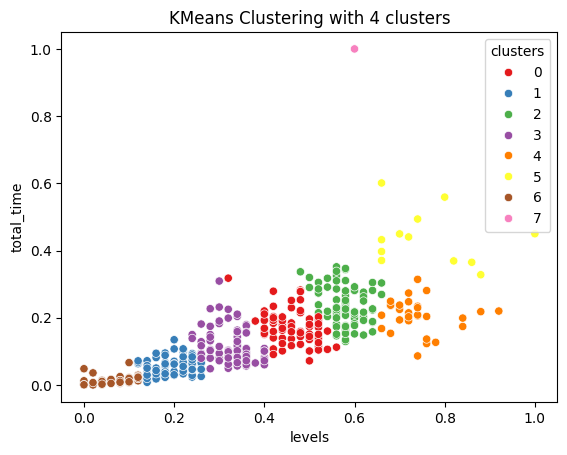

In [91]:
# Create a dataframe which contains only the levels_completed and total_time columns
completed_verbs_temp = completed_verbs[['levels', 'total_time']]
# Scale the data
scaler = MinMaxScaler()
cluster_df_scaled = scaler.fit_transform(completed_verbs_temp)
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=['levels', 'total_time'])

display(cluster_df_scaled)

# Create a KMeans model with 4 clusters
kmeans = KMeans()
# Fit the data
kmeans.fit(cluster_df_scaled)
# Get the cluster labels
cluster_df_scaled['clusters'] = kmeans.labels_


# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='levels', y='total_time', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

----------------------------------------
Dominant predicted class: 


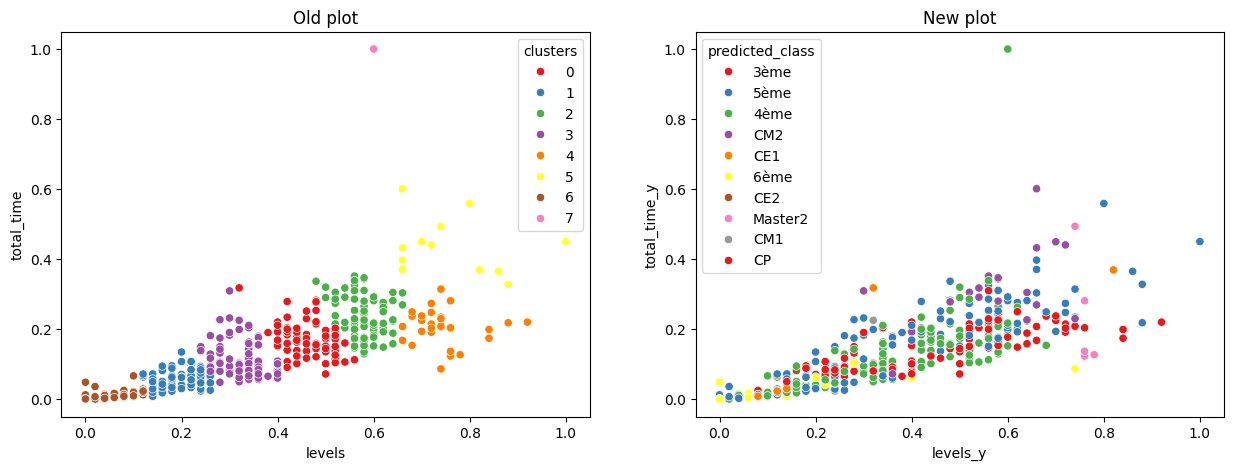

In [105]:
# Merge the completed_verbs and cluster_df_scaled dataframes
merged_completed_verbs = pd.merge(completed_verbs, cluster_df_scaled, left_index=True, right_index=True)

# For each cluster, get the dominant predicted class and store the result in a variable
print('----------------------------------------')
print('Dominant predicted class: ')
dominant_predicted_class = merged_completed_verbs.groupby('clusters')['predicted_class'].agg(lambda x: x.value_counts().index[0])

# Scatter plot of the clusters with the dominant predicted class and the old plot side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='levels', y='total_time', hue='clusters', data=cluster_df_scaled, palette='Set1', ax=ax1)
ax1.set_title('Old plot')
sns.scatterplot(x='levels_y', y='total_time_y', hue='predicted_class', data=merged_completed_verbs, palette='Set1', ax=ax2)
ax2.set_title('New plot')
plt.show()

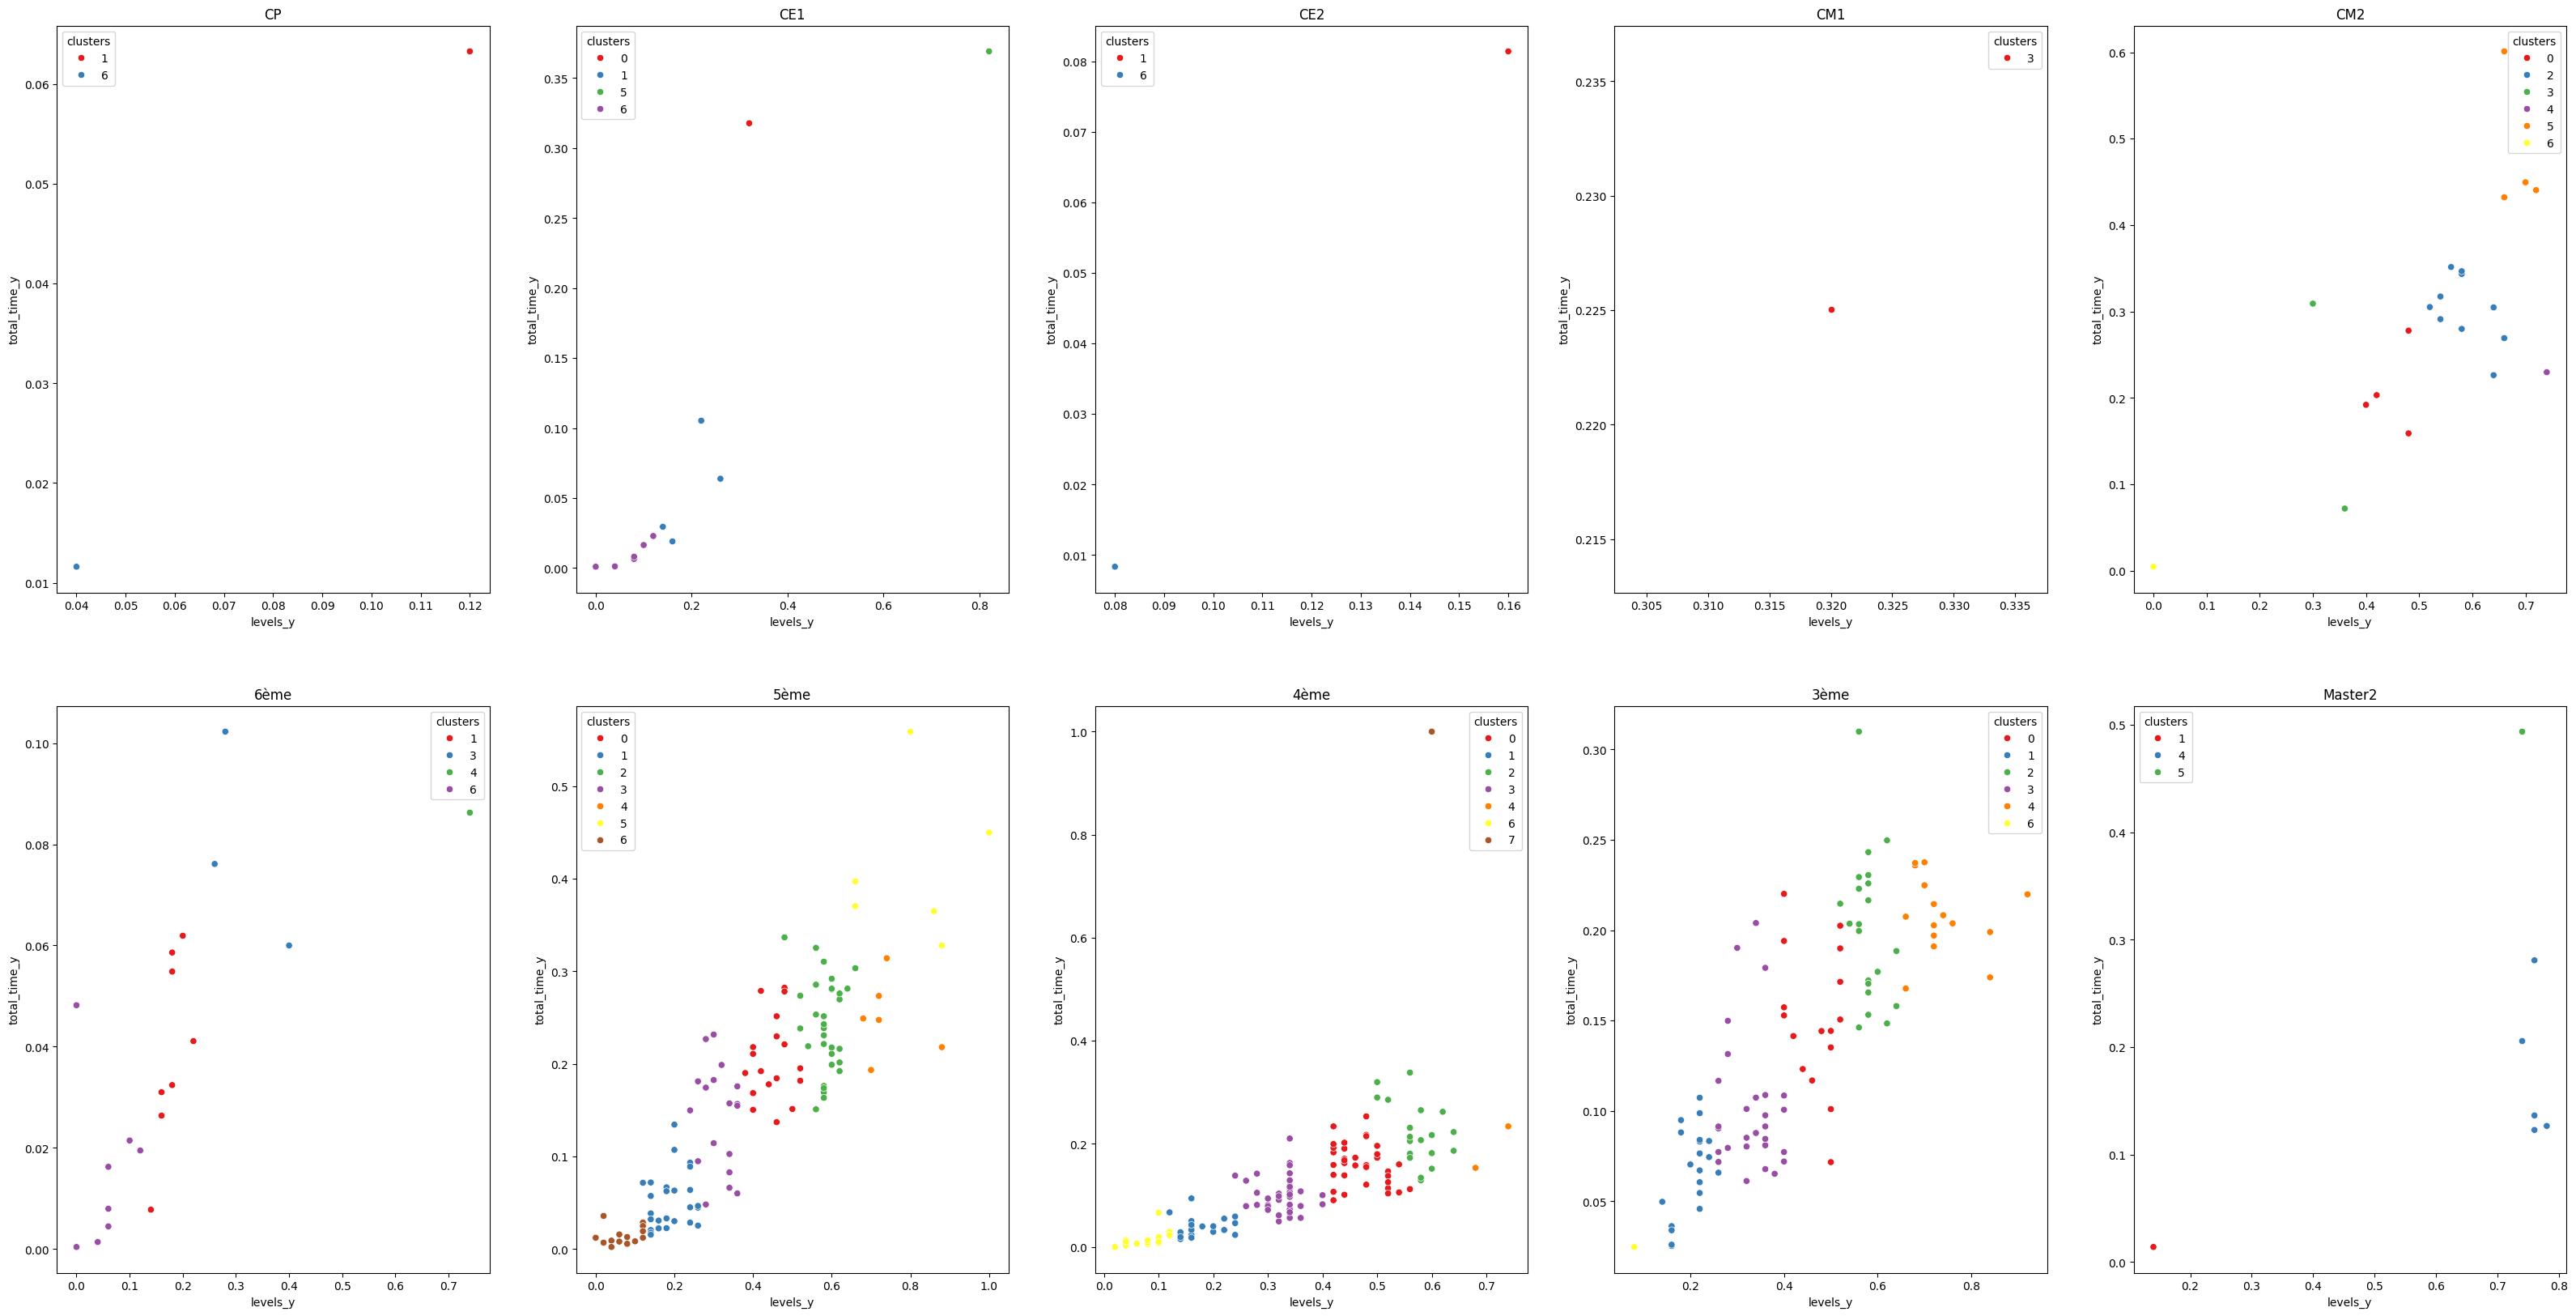

In [116]:
# Plot the clusters of each predicted class side by side (CP, CE1, CE2, CM1, CM2, then in another fig 6ème, 5ème, 4ème, 3ème, Master2) of cluster_df_scaled
fig, axes = plt.subplots(2, 5, figsize=(40, 20))
axes = axes.flatten()
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'CP'], palette='Set1', ax=axes[0])
axes[0].set_title('CP')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'CE1'], palette='Set1', ax=axes[1])
axes[1].set_title('CE1')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'CE2'], palette='Set1', ax=axes[2])
axes[2].set_title('CE2')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'CM1'], palette='Set1', ax=axes[3])
axes[3].set_title('CM1')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'CM2'], palette='Set1', ax=axes[4])
axes[4].set_title('CM2')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == '6ème'], palette='Set1', ax=axes[5])
axes[5].set_title('6ème')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == '5ème'], palette='Set1', ax=axes[6])
axes[6].set_title('5ème')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == '4ème'], palette='Set1', ax=axes[7])
axes[7].set_title('4ème')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == '3ème'], palette='Set1', ax=axes[8])
axes[8].set_title('3ème')
sns.scatterplot(x='levels_y', y='total_time_y', hue='clusters', data=merged_completed_verbs[merged_completed_verbs['predicted_class'] == 'Master2'], palette='Set1', ax=axes[9])
axes[9].set_title('Master2')
plt.show()

In [ ]:
# Instead of using the total time spent by each actor, use the mean time spent by each actor
# compute the mean time spent by each actor
mean_time_spent = spy_data.groupby('actor')['time'].mean()

# Add a column to completed_verbs dataframe which contains the mean time spent by each actor
completed_verbs['mean_time'] = completed_verbs['actor'].apply(lambda x: mean_time_spent[x])

In [121]:
completed_verbs_temp

,levels,mean_time
0,12,68.056750
1,32,56.807735
2,11,48.152455
3,18,64.541900
4,29,153.495675
...,...,...
428,51,58.615724
429,44,51.412427
430,14,136.673067
431,16,123.368000


f:\Machine_Learning\Anaconda\envs\IAR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


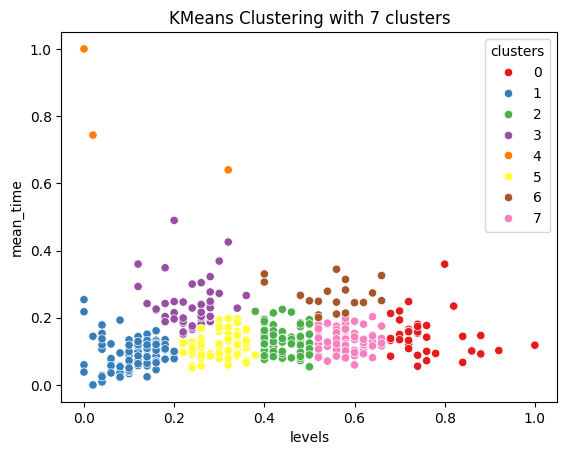

In [136]:
# Create a dataframe which contains only the levels_completed and total_time columns
completed_verbs_temp = completed_verbs[['levels', 'mean_time']]
# Scale the data
scaler = MinMaxScaler()
cluster_df_scaled = scaler.fit_transform(completed_verbs_temp)
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=['levels', 'mean_time'])

# Create a KMeans model with 4 clusters
kmeans = KMeans()
# Fit the data
kmeans.fit(cluster_df_scaled)
# Get the cluster labels
cluster_df_scaled['clusters'] = kmeans.labels_


# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='levels', y='mean_time', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 7 clusters')
plt.show()

In [142]:
import json

def count_stars(level_data_str):
    # Convert the string to a valid JSON by replacing single quotes with double quotes
    level_data_str = level_data_str.replace("'", '"')
    
    # Parse the string into a dictionary
    level_data = json.loads(level_data_str)
    
    # Sum the number of stars for each level
    total_stars = sum(level_data.values())
    
    return total_stars

# With spy_profiles dataframe, create a new column which contains the total number of stars for each actor.
# To do so, use the count_stars function, and iterate over the HighScore column.
spy_profile['total_stars'] = spy_profile['HighScore'].apply(lambda x: count_stars(x))

In [145]:
# We want to put the number of total_stars in completed_verbs
completed_verbs['total_stars'] = completed_verbs['actor'].apply(lambda x: spy_profile[spy_profile['ID'] == x]['total_stars'].values[0])

completed_verbs

,actor,predicted_class,levels,total_time,mean_time,total_stars
0,103D4EAB,3ème,12,816.681,68.056750,31
1,133323C,5ème,32,4715.042,56.807735,104
2,1410D322,4ème,11,529.677,48.152455,28
3,149C46A2,4ème,18,1290.838,64.541900,51
4,14A766E2,CM2,29,6139.827,153.495675,74
...,...,...,...,...,...,...
428,FC5E2940,5ème,51,7854.507,58.615724,167
429,FC5E2A23,5ème,44,6375.141,51.412427,131
430,FD08B42E,3ème,14,2050.096,136.673067,22
431,FEA2C977,3ème,16,3330.936,123.368000,39


In [147]:
# Print the actor who has the highest number of stars with the total number of stars, the predicted class and the number of levels completed
print('----------------------------------------')
print('Highest number of stars: ')
display(completed_verbs[completed_verbs['total_stars'] == completed_verbs['total_stars'].max()])

----------------------------------------
Highest number of stars: 


,actor,predicted_class,levels,total_time,mean_time,total_stars
428,FC5E2940,5ème,51,7854.507,58.615724,167


f:\Machine_Learning\Anaconda\envs\IAR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


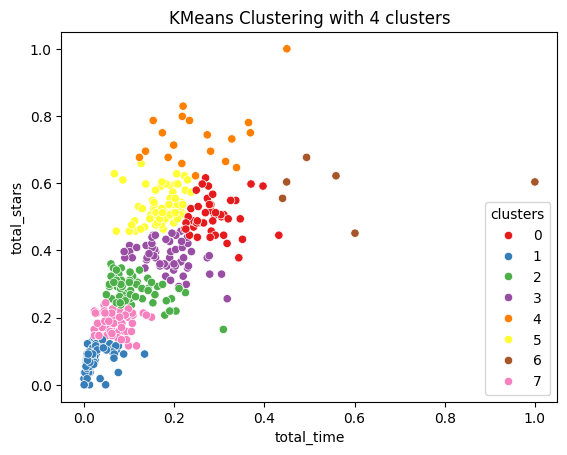

In [159]:
# Make a clustering of the actors based on the number of levels completed and the number of stars
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Create a dataframe which contains only the levels_completed and total_stars columns
completed_verbs_temp = completed_verbs[['total_time', 'total_stars']]
# Scale the data
scaler = MinMaxScaler()
cluster_df_scaled = scaler.fit_transform(completed_verbs_temp)
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=['total_time', 'total_stars'])

# Create a KMeans model with 4 clusters
kmeans = KMeans()
# Fit the data
kmeans.fit(cluster_df_scaled)
# Get the cluster labels
cluster_df_scaled['clusters'] = kmeans.labels_

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='total_time', y='total_stars', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

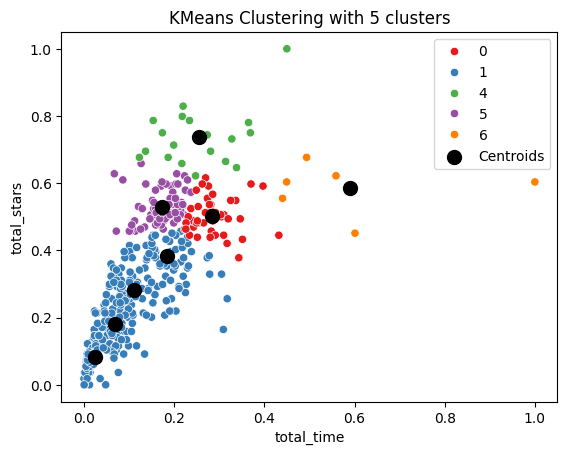

In [162]:
# Group the clusters 1, 2, 3 and 7 together
cluster_df_scaled['clusters'] = cluster_df_scaled['clusters'].replace([1, 2, 3, 7], 1)

# Plot the clusters

sns.scatterplot(x='total_time', y='total_stars', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 5 clusters')
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.legend()
plt.show()

In [163]:
# Save the completed_verbs dataframe to a csv file
completed_verbs.to_csv('completed_verbs.csv', index=False)

f:\Machine_Learning\Anaconda\envs\IAR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


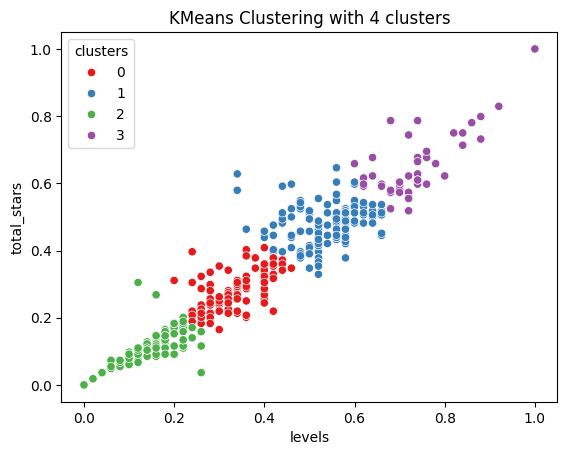

In [165]:
# Make a clustering of the actors based on the number of levels completed and the number of stars
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Create a dataframe which contains only the levels_completed and total_stars columns
completed_verbs_temp = completed_verbs[['levels', 'total_stars']]
# Scale the data
scaler = MinMaxScaler()
cluster_df_scaled = scaler.fit_transform(completed_verbs_temp)
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=['levels', 'total_stars'])

# Create a KMeans model with 4 clusters
kmeans = KMeans(n_clusters=4)
# Fit the data
kmeans.fit(cluster_df_scaled)
# Get the cluster labels
cluster_df_scaled['clusters'] = kmeans.labels_

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='levels', y='total_stars', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

In [166]:
def average_stars(level_data_str):
    """
    Takes a string representation of a dictionary where keys are level paths and values are the number of stars obtained.
    Returns the average number of stars obtained per level.
    
    :param level_data_str: String representation of the levels and stars data
    :return: Average number of stars per level
    """
    # Convert the string to a valid JSON by replacing single quotes with double quotes
    level_data_str = level_data_str.replace("'", '"')
    
    # Parse the string into a dictionary
    level_data = json.loads(level_data_str)
    
    # Calculate the total number of stars and the number of levels
    total_stars = sum(level_data.values())
    num_levels = len(level_data)
    
    # Calculate the average stars per level
    average_stars_per_level = total_stars / num_levels if num_levels > 0 else 0
    
    return average_stars_per_level

# With spy_profiles dataframe, create a new column which contains the mean number of stars for each actor.
# To do so, use the count_stars function, and iterate over the HighScore column.
spy_profile['mean_stars'] = spy_profile['HighScore'].apply(lambda x: average_stars(x))

In [168]:
# We want to put the number of mean_stars in completed_verbs
completed_verbs['mean_stars'] = completed_verbs['actor'].apply(lambda x: spy_profile[spy_profile['ID'] == x]['mean_stars'].values[0])

completed_verbs

,actor,predicted_class,levels,total_time,mean_time,total_stars,mean_stars
0,103D4EAB,3ème,12,816.681,68.056750,31,2.583333
1,133323C,5ème,32,4715.042,56.807735,104,2.888889
2,1410D322,4ème,11,529.677,48.152455,28,2.545455
3,149C46A2,4ème,18,1290.838,64.541900,51,2.833333
4,14A766E2,CM2,29,6139.827,153.495675,74,2.466667
...,...,...,...,...,...,...,...
428,FC5E2940,5ème,51,7854.507,58.615724,167,2.929825
429,FC5E2A23,5ème,44,6375.141,51.412427,131,2.977273
430,FD08B42E,3ème,14,2050.096,136.673067,22,1.571429
431,FEA2C977,3ème,16,3330.936,123.368000,39,2.437500


f:\Machine_Learning\Anaconda\envs\IAR\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


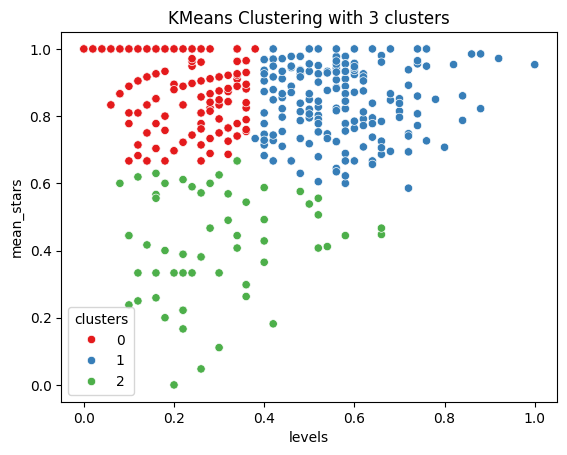

In [173]:
# Make a clustering of the actors based on the number of levels completed and the average of stars
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Create a dataframe which contains only the levels_completed and total_stars columns
completed_verbs_temp = completed_verbs[['levels', 'mean_stars']]
# Scale the data
scaler = MinMaxScaler()
cluster_df_scaled = scaler.fit_transform(completed_verbs_temp)
cluster_df_scaled = pd.DataFrame(cluster_df_scaled, columns=['levels', 'mean_stars'])

# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=3)
# Fit the data
kmeans.fit(cluster_df_scaled)
# Get the cluster labels
cluster_df_scaled['clusters'] = kmeans.labels_

# Plot the clusters
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='levels', y='mean_stars', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

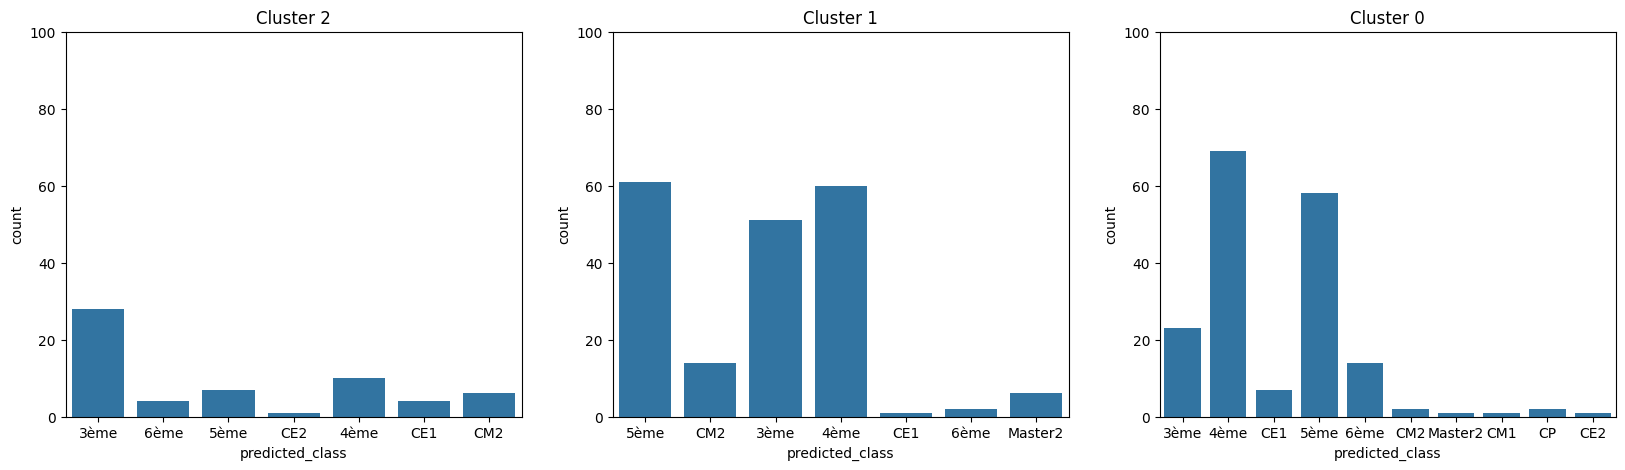

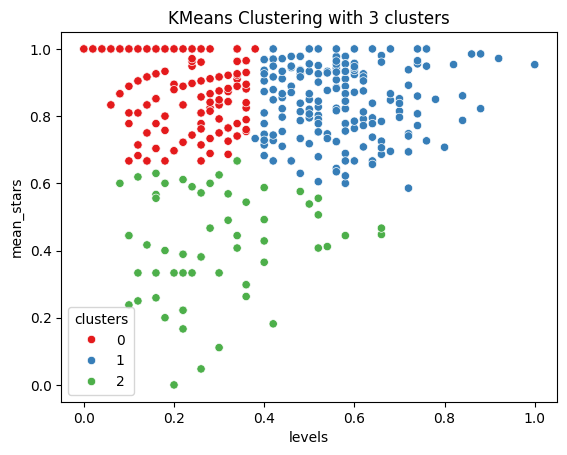

In [197]:
# Get the actors of the cluster 2
actors_cluster_2 = cluster_df_scaled[cluster_df_scaled['clusters'] == 2]

# Retrieve the actors of the cluster 2 in the completed_verbs dataframe by using the index
actors_cluster_2 = completed_verbs.iloc[actors_cluster_2.index]

# Get the actors of the cluster 1
actors_cluster_1 = cluster_df_scaled[cluster_df_scaled['clusters'] == 1]

# Retrieve the actors of the cluster 1 in the completed_verbs dataframe by using the index
actors_cluster_1 = completed_verbs.iloc[actors_cluster_1.index]

# Get the actors of the cluster 0
actors_cluster_0 = cluster_df_scaled[cluster_df_scaled['clusters'] == 0]

# Retrieve the actors of the cluster 0 in the completed_verbs dataframe by using the index
actors_cluster_0 = completed_verbs.iloc[actors_cluster_0.index]

# Plot the actors of the cluster 2 then cluster 1 and then 0 as bar plot by using the predicted_class column side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Set max and min values for the y axis
axes[0].set_ylim([0, 100])
axes[1].set_ylim([0, 100])
axes[2].set_ylim([0, 100])

axes = axes.flatten()
sns.countplot(x='predicted_class', data=actors_cluster_2, ax=axes[0])
axes[0].set_title('Cluster 2')
sns.countplot(x='predicted_class', data=actors_cluster_1, ax=axes[1])
axes[1].set_title('Cluster 1')
sns.countplot(x='predicted_class', data=actors_cluster_0, ax=axes[2])
axes[2].set_title('Cluster 0')
plt.show()

# Replot the clusters with the predicted_class column
sns.scatterplot(x='levels', y='mean_stars', hue='clusters', data=cluster_df_scaled, palette='Set1')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

In [198]:
# Save the completed_verbs dataframe to a csv file
completed_verbs.to_csv('completed_verbs.csv', index=False)